In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def load_evaluation_results(file_path):
    with open(file_path, 'r') as f:
        results = json.load(f)
    return results['all_distances'], results['means']

def plot_sorted_distances(all_distances):
    plt.figure(figsize=(12, 6))

    checkpoints = [0, 2, 7]
    colors = ['red', 'green', 'blue']
    labels = ['Checkpoint 0', 'Checkpoint 2', 'Checkpoint 7']

    for checkpoint, color, label in zip(checkpoints, colors, labels):
        sorted_distances = all_distances[str(checkpoint)]
        plt.hist(sorted_distances, bins=20, alpha=0.5, color=color, label=label)

    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title('Distribution of Distances for Checkpoints 0, 2, and 7')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

def advanced_analysis(all_distances):
    fig = plt.figure(figsize=(15, 10))

    # 箱型图
    ax1 = fig.add_subplot(221)
    sns.boxplot(data=[all_distances[str(i)] for i in range(10)], ax=ax1)
    ax1.set_title('Boxplot of Distances for Each Checkpoint')
    ax1.set_xlabel('Checkpoint')
    ax1.set_ylabel('Distance')

    # CDF
    ax2 = fig.add_subplot(222)
    for i in range(0, 10, 2):  # 每隔一个checkpoint画一条CDF曲线
        sns.ecdfplot(all_distances[str(i)], label=f'Checkpoint {i}', ax=ax2)
    ax2.set_title('Cumulative Distribution Function of Distances')
    ax2.set_xlabel('Distance')
    ax2.set_ylabel('Cumulative Probability')
    ax2.legend()

    # 中位数和四分位数范围
    medians = [np.median(all_distances[str(i)]) for i in range(10)]
    q1 = [np.percentile(all_distances[str(i)], 25) for i in range(10)]
    q3 = [np.percentile(all_distances[str(i)], 75) for i in range(10)]

    ax3 = fig.add_subplot(223)
    ax3.plot(range(10), medians, marker='o', label='Median')
    ax3.fill_between(range(10), q1, q3, alpha=0.2, label='IQR')
    ax3.set_title('Median and IQR of Distances')
    ax3.set_xlabel('Checkpoint')
    ax3.set_ylabel('Distance')
    ax3.legend()

    # 距离变化率
    changes = [np.mean(all_distances[str(i+1)]) - np.mean(all_distances[str(i)]) for i in range(9)]
    ax4 = fig.add_subplot(224)
    ax4.bar(range(9), changes)
    ax4.set_title('Average Change in Distance Between Checkpoints')
    ax4.set_xlabel('Checkpoint Transition')
    ax4.set_ylabel('Change in Average Distance')

    plt.tight_layout()

    # 计算并打印一些统计量
    print("Statistics:")
    for i in range(10):
        print(f"Checkpoint {i}:")
        print(f"  Mean: {np.mean(all_distances[str(i)]):.2f}")
        print(f"  Median: {np.median(all_distances[str(i)]):.2f}")
        print(f"  Std Dev: {np.std(all_distances[str(i)]):.2f}")
        print(f"  Skewness: {stats.skew(all_distances[str(i)]):.2f}")
        print(f"  Kurtosis: {stats.kurtosis(all_distances[str(i)]):.2f}")
        print()

def plot_means(means):
    plt.figure(figsize=(10, 6))
    plt.plot(range(10), means, marker='o')
    plt.xlabel('Checkpoint')
    plt.ylabel('Mean Distance')
    plt.title('Mean Distance for Each Checkpoint')
    plt.xticks(range(10))

def main():
    version = "distractor"
    # 从保存的文件中加载数据
    all_distances, means = load_evaluation_results("evaluation_results"+version+".json")

    # 绘制直方图
    plot_sorted_distances(all_distances)
    plt.show()

    # 进行高级分析并绘图
    advanced_analysis(all_distances)
    plt.show()

    # 绘制均值折线图
    plot_means(means)
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def load_data(version):
    with open(f"evaluation_results{version}.json", "r") as f:
        return json.load(f)

def compare_medians(base_data, distractor_data, modified_data):
    plt.figure(figsize=(12, 6))
    for data, label in zip([base_data, distractor_data, modified_data], ['Base', 'Distractor', 'Modified']):
        medians = [np.median(data['all_distances'][str(i)]) for i in range(10)]
        plt.plot(range(10), medians, marker='o', label=label)
    plt.xlabel('Checkpoint')
    plt.ylabel('Median Distance')
    plt.title('Comparison of Median Distances Across Versions')
    plt.legend()
    plt.grid(True)
    plt.show()

def compare_distributions(base_data, distractor_data, modified_data):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i, checkpoint in enumerate([0, 4, 9]):  # Compare first, middle, and last checkpoints
        sns.kdeplot(base_data['all_distances'][str(checkpoint)], label='Base', ax=axs[i])
        sns.kdeplot(distractor_data['all_distances'][str(checkpoint)], label='Distractor', ax=axs[i])
        sns.kdeplot(modified_data['all_distances'][str(checkpoint)], label='Modified', ax=axs[i])
        axs[i].set_title(f'Checkpoint {checkpoint}')
        axs[i].set_xlabel('Distance')
        axs[i].set_ylabel('Density')
        axs[i].legend()
    plt.tight_layout()
    plt.show()

def compare_statistics(base_data, distractor_data, modified_data):
    versions = ['Base', 'Distractor', 'Modified']
    stats_data = {v: {} for v in versions}
    
    for version, data in zip(versions, [base_data, distractor_data, modified_data]):
        for checkpoint in range(10):
            distances = data['all_distances'][str(checkpoint)]
            stats_data[version][checkpoint] = {
                'median': np.median(distances),
                'mean': np.mean(distances),
                'std': np.std(distances),
                'iqr': np.percentile(distances, 75) - np.percentile(distances, 25)
            }
    
    # Print summary statistics
    for stat in ['median', 'mean', 'std', 'iqr']:
        print(f"\nComparison of {stat.upper()}:")
        for version in versions:
            values = [stats_data[version][cp][stat] for cp in range(10)]
            print(f"{version}: Min = {min(values):.2f}, Max = {max(values):.2f}, Avg = {np.mean(values):.2f}")

    return stats_data

def performance_improvement(data):
    first_checkpoint = np.median(data['all_distances']['0'])
    last_checkpoint = np.median(data['all_distances']['9'])
    return (first_checkpoint - last_checkpoint) / first_checkpoint * 100

def main():
    base_data = load_data("base")
    distractor_data = load_data("distractor")
    modified_data = load_data("modified")

    compare_medians(base_data, distractor_data, modified_data)
    compare_distributions(base_data, distractor_data, modified_data)
    stats_data = compare_statistics(base_data, distractor_data, modified_data)

    # Calculate overall performance improvement
    print("\nOverall Performance Improvement:")
    for version, data in zip(['Base', 'Distractor', 'Modified'], [base_data, distractor_data, modified_data]):
        improvement = performance_improvement(data)
        print(f"{version}: {improvement:.2f}%")

if __name__ == "__main__":
    main()

## Performance Evaluation

Using device: cuda:1


Result of test version: base

base model: 0.9861218089788732
distractor model: 0.9765165441176471
modified model: 0.9827586206896551

Result of test version: distractor:
base model: 0.997422526322782
distractor model: 0.9977452057023164
modified model: 0.9977168830762655



/tmp/ipykernel_2590716/4090110972.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
/tmp/ipykernel_2590716/4090110972.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')


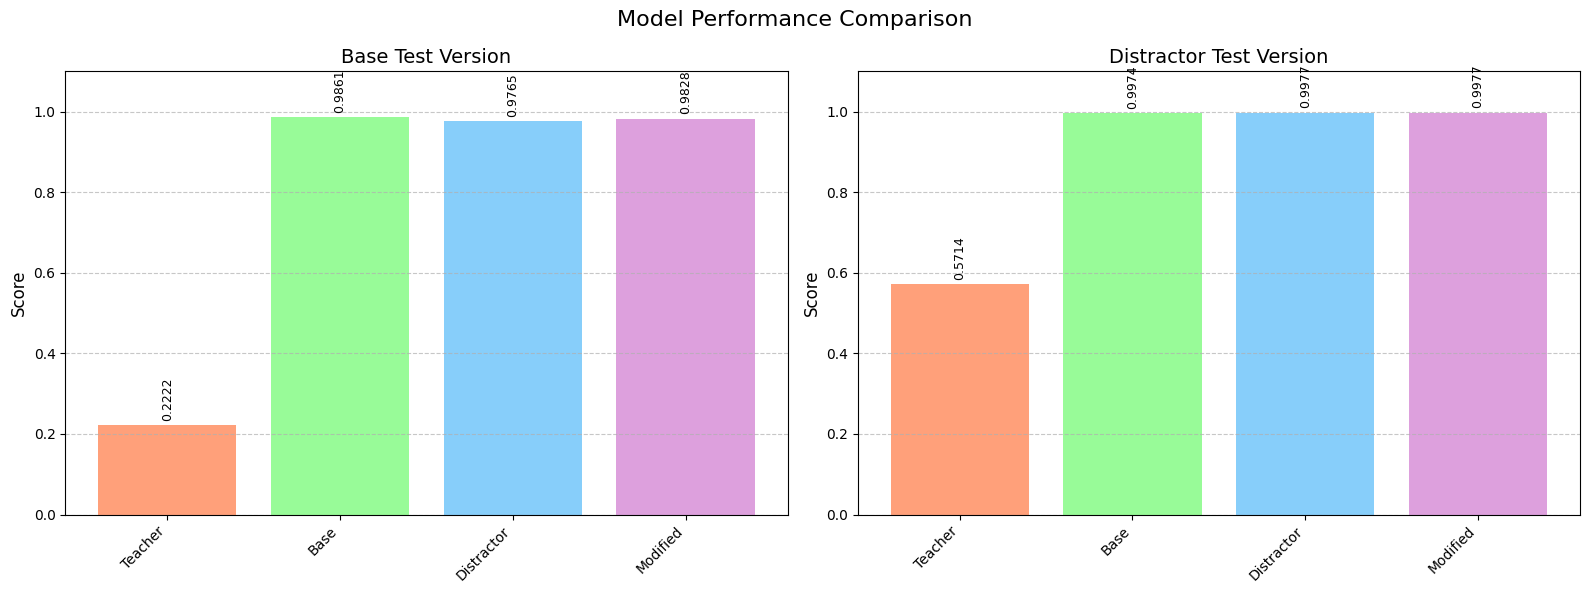

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
test_versions = ['Base Test', 'Distractor Test']
models = ['Teacher', 'Base', 'Distractor', 'Modified']

results = {
    'Base Test': [0.2222222222222222, 0.9861218089788732, 0.9765165441176471, 0.9827586206896551],
    'Distractor Test': [0.5714285714285714, 0.997422526322782, 0.9977452057023164, 0.9977168830762655]
}

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Colors for the bars
colors = ['#FFA07A', '#98FB98', '#87CEFA', '#DDA0DD']

# Function to create histogram for each test version
def create_histogram(ax, data, title):
    bars = ax.bar(models, data, color=colors)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_ylim(0, 1.1)  # Set y-axis limit from 0 to 1.1
    
    # Add value labels on the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90, fontsize=9)
    
    # Add grid for easier comparison
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(models, rotation=45, ha='right')

# Create histograms
create_histogram(ax1, results['Base Test'], 'Base Test Version')
create_histogram(ax2, results['Distractor Test'], 'Distractor Test Version')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Test performance on models

GPT-neox-20b

In [1]:
import json
import numpy as np
from tqdm import tqdm
from calculate_distance import compare_rationales

def load_jsonl(file_path):
    with open(file_path, 'r') as f:
        return [json.loads(line) for line in f]

def calculate_distances(model_output, gold_data, version):
    distances = []
    for model_item, gold_item in tqdm(zip(model_output, gold_data), total=len(model_output)):
        model_cot = {
            "chain_of_thought": model_item["chain_of_thought"],
            "answer": model_item["answer"],
            "question": model_item["question"]
        }
        gold_cot = {
            "chain_of_thought": gold_item[version]["chain_of_thought"],
            "answer": gold_item[version]["answer"],
            "question": gold_item[version]["question"]
        }
        distance = compare_rationales(model_cot, gold_cot)
        distances.append(distance)
    return distances

def main():
    versions = ['base', 'distractor', 'modified']
    gold_data_path = "./data/CounterCoTQA/dev.jsonl"
    
    gold_data = load_jsonl(gold_data_path)

    for version in versions:
        print(f"Processing version: {version}")
        
        model_output_path = f"./outputs/CounterCoTQA/gpt-neox-20b/dev.{version}.explanation.jsonl"
        model_output = load_jsonl(model_output_path)
        
        distances = calculate_distances(model_output, gold_data, version)
        
        median_distance = np.median(distances)
        print(f"Median distance for {version}: {median_distance}")
        
        
        print(f"Distances for {version} saved.")

if __name__ == "__main__":
    main()

Processing version: base


100%|██████████| 551/551 [00:00<00:00, 1634.94it/s]


Median distance for base: 0.2222222222222222
Distances for base saved.
Processing version: distractor


100%|██████████| 551/551 [00:00<00:00, 929.81it/s] 


Median distance for distractor: 0.5714285714285714
Distances for distractor saved.
Processing version: modified


 37%|███▋      | 204/551 [00:00<00:00, 981.47it/s] 

100%|██████████| 551/551 [00:00<00:00, 985.27it/s] 

Median distance for modified: 0.6
Distances for modified saved.


gemme-2b

In [1]:
import json
import numpy as np
from tqdm import tqdm
from calculate_distance import compare_rationales

def load_jsonl(file_path):
    with open(file_path, 'r') as f:
        return [json.loads(line) for line in f]

def calculate_distances(model_output, gold_data, version):
    distances = []
    for model_item, gold_item in tqdm(zip(model_output, gold_data), total=len(model_output)):
        model_cot = {
            "chain_of_thought": model_item["chain_of_thought"],
            "answer": model_item["answer"],
            "question": model_item["question"]
        }
        gold_cot = {
            "chain_of_thought": gold_item[version]["chain_of_thought"],
            "answer": gold_item[version]["answer"],
            "question": gold_item[version]["question"]
        }
        distance = compare_rationales(model_cot, gold_cot)
        distances.append(distance)
    return distances

def main():
    versions = ['base', 'distractor', 'modified']
    # versions = ['base']
    gold_data_path = "./data/CounterCoTQA/dev.jsonl"
    
    gold_data = load_jsonl(gold_data_path)

    for version in versions:
        print(f"Processing version: {version}")
        
        model_output_path = f"./outputs/CounterCoTQA/gpt-4o/dev.{version}.explanation.jsonl"
        model_output = load_jsonl(model_output_path)
        
        distances = calculate_distances(model_output[:38], gold_data[:38], version)
        
        median_distance = np.median(distances)
        print(f"Median distance for {version}: {median_distance}")
        
        
        print(f"Distances for {version} saved.")

if __name__ == "__main__":
    main()

Processing version: base


 28%|██▊       | 28/100 [00:00<00:00, 1417.37it/s]


IndexError: list index out of range